In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
''' Receive an array and compute x,y to plot '''

def ecdf(data):
    
    import numpy as np
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1)/ n

    return x, y

In [4]:
''' Given an x,y  from ecdf plots ecdf graphically'''

def ecdf_plot(x, y, xlabel='name of xlabel'):
    
    import matplotlib.pyplot as plt
    
    _ = plt.plot(x,y,marker='.',linestyle='none')
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()


# Vesuvio Eruptions - Inference

Data collected:

- geo.mtu.edu/volcanoes/boris/mirror/mirrored_html/VESUVIO_elenco.html
- https://pt.wikipedia.org/wiki/Ves%C3%BAvio
- https://www.statology.org/exponential-distribution-real-life-examples/
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
- https://sfb574.geomar.de/eruption-probabilities.html

Why poisson distributions?

https://pages.mtu.edu/~raman/papers2/Jonesetal99JVGR.pdf

Data between two possible years will be used in mean of them.

In [5]:
eruptions = np.array([79,172, 203, 222,303, 379, 472, 512, 536, 685, 787,860,900, 968, 991, 999, 1006, 1037, 1049,1073, 1139, 1150,1270, 1347, 1500, 1631,1872,1906, 1929,1944])

In [6]:
years_eruption = np.diff(eruptions)
years_eruption

array([ 93,  31,  19,  81,  76,  93,  40,  24, 149, 102,  73,  40,  68,
        23,   8,   7,  31,  12,  24,  66,  11, 120,  77, 153, 131, 241,
        34,  23,  15])

In [7]:
years_eruption.mean()

64.3103448275862

In [8]:
len(years_eruption)

29

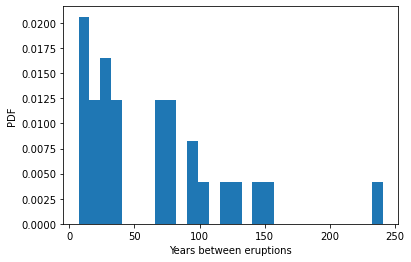

In [9]:
_ = plt.hist(years_eruption,density=True,bins=28)
_ = plt.ylabel('PDF')
_ = plt.xlabel('Years between eruptions')
plt.show()

In [10]:
x_real,y_real = ecdf(years_eruption)

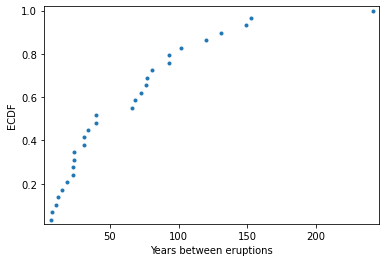

In [11]:
ecdf_plot(x_real,y_real, xlabel='Years between eruptions')

# Statistics Hacking

In [19]:
simulation_eruptions = np.random.exponential(64.31,size=10000)

In [20]:
simulation_eruptions = np.random.exponential(years_eruption.mean(),size=1000000)

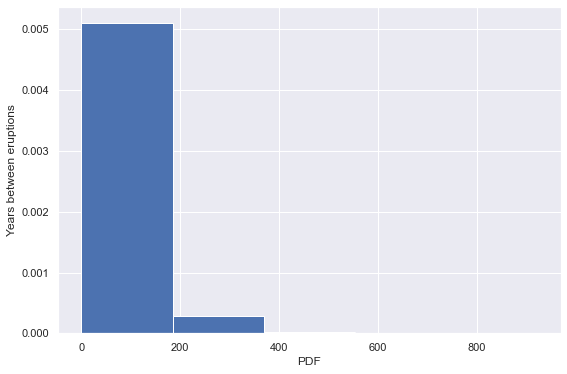

In [21]:
_ = plt.hist(simulation_eruptions,density=True,bins=5)
_ = plt.xlabel('PDF')
_ = plt.ylabel('Years between eruptions')

In [22]:
x_theorical,y_theorical = ecdf(simulation_eruptions)

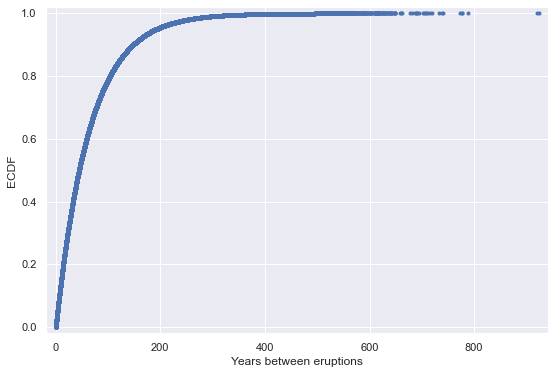

In [23]:
sns.set(rc={'figure.figsize':(9,6)})
ecdf_plot(x_theorical,y_theorical, xlabel='Years between eruptions')

# CDF x ECDF - Exponential

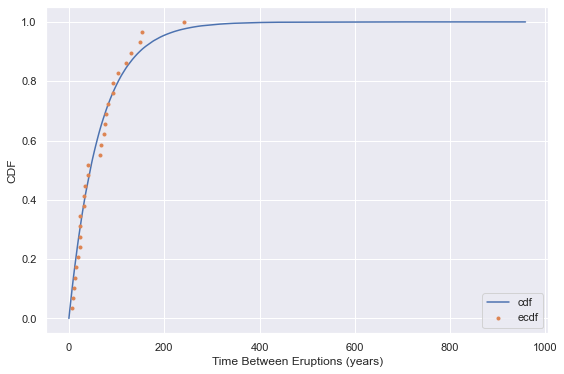

In [24]:
sns.set(rc={'figure.figsize':(9,6)})
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.exponential(years_eruption.mean(),size=1000000)

# Get the CDF of the samples and of the data

x_theorical,y_theorical = ecdf(samples)
x_real,y_real = ecdf(years_eruption)

# Plot the CDFs and show the plot
_ = plt.plot(x_theorical,y_theorical)
_ = plt.plot(x_real,y_real, marker='.', linestyle='none')
_ = plt.legend(('cdf', 'ecdf'), loc='lower right')
_ = plt.xlabel('Time Between Eruptions (years)')
_ = plt.ylabel('CDF')
plt.show()

# Knowing the last Vesivious eurption 1944 And the probability that will happen in next 5 years :

In [16]:
years = 2022-eruptions.max()
years

78

In [17]:
len(eruptions)

30

In [18]:
proba_explosion = sum(simulation_eruptions<=78)/1000000

In [19]:
proba_explosion 

0.703547

In [20]:
sum(simulation_eruptions<=83)/1000000 - sum(simulation_eruptions<=78)/1000000

0.022189000000000014

In [21]:
0.022*100

2.1999999999999997

In [22]:
proba_explosion

0.703547

# Modeling as Poisson

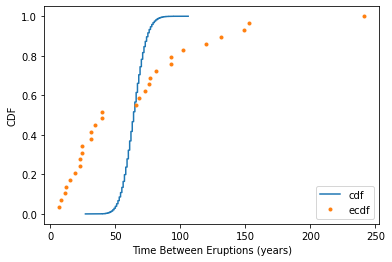

In [42]:
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.poisson(years_eruption.mean(),size=1000000)

# Get the CDF of the samples and of the data

x_theorical,y_theorical = ecdf(samples)
x_real,y_real = ecdf(years_eruption)

# Plot the CDFs and show the plot
_ = plt.plot(x_theorical,y_theorical)
_ = plt.plot(x_real,y_real, marker='.', linestyle='none')
_ = plt.legend(('cdf', 'ecdf'), loc='lower right')
_ = plt.xlabel('Time Between Eruptions (years)')
_ = plt.ylabel('CDF')
plt.show()

In [24]:
import scipy

In [25]:
from scipy.stats import ks_2samp

# P valor < 0,05 ou seja Sem diferença entre Ho e Ha - Exponential

In [26]:
scipy.stats.ks_2samp( np.random.exponential(years_eruption.mean(),size=1000), samples, alternative='two-sided', mode='exact')

KstestResult(statistic=0.504488, pvalue=1.0)

In [27]:
scipy.stats.ks_2samp( np.random.exponential(years_eruption.mean(),size=1000), samples, alternative='two-sided', mode='exact')

KstestResult(statistic=0.504639, pvalue=1.0)

In [28]:
from scipy import stats

In [30]:
y_theorical

array([1.00000e-06, 2.00000e-06, 3.00000e-06, ..., 9.99998e-01,
       9.99999e-01, 1.00000e+00])

In [31]:
y_real

array([0.03448276, 0.06896552, 0.10344828, 0.13793103, 0.17241379,
       0.20689655, 0.24137931, 0.27586207, 0.31034483, 0.34482759,
       0.37931034, 0.4137931 , 0.44827586, 0.48275862, 0.51724138,
       0.55172414, 0.5862069 , 0.62068966, 0.65517241, 0.68965517,
       0.72413793, 0.75862069, 0.79310345, 0.82758621, 0.86206897,
       0.89655172, 0.93103448, 0.96551724, 1.        ])

In [62]:
years_eruption.mean()

64.3103448275862

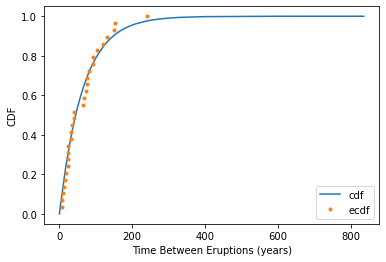

In [40]:
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.exponential(years_eruption.mean(),size=1000000)

# Get the CDF of the samples and of the data

x_theorical,y_theorical = ecdf(samples)
x_real,y_real = ecdf(years_eruption)

# Plot the CDFs and show the plot
_ = plt.plot(x_theorical,y_theorical)
_ = plt.plot(x_real,y_real, marker='.', linestyle='none')
_ = plt.legend(('cdf', 'ecdf'), loc='lower right')
_ = plt.xlabel('Time Between Eruptions (years)')
_ = plt.ylabel('CDF')
plt.show()

In [61]:
scipy.stats.kstest(eruptions, cdf  = y_theorical)

KstestResult(statistic=1.0, pvalue=0.0)

In [47]:
rng = np.random.default_rng()

In [48]:
stats.kstest(stats.norm.rvs(size=100, random_state=rng), stats.norm.cdf)

KstestResult(statistic=0.06025639997763785, pvalue=0.8392557520248641)

In [49]:
stats.norm.rvs(size=100, random_state=rng)

array([ 1.12969504,  0.19520982,  0.23614038, -0.84527233,  0.07636914,
       -0.14062468,  2.52375166, -2.80046398,  0.31665966,  0.11195918,
        0.98081623, -0.55489802, -0.45282032, -0.22139732, -1.6998146 ,
        1.17471388, -0.56826057, -1.14240056, -0.35064598,  1.69946105,
       -0.58038382,  1.03729677, -0.63683359,  0.82704859, -1.57508895,
       -0.75404974,  1.28492431,  0.82523875,  0.36280576, -0.22036926,
       -0.1291811 , -0.02020146,  0.31535506, -0.50432283, -0.5957657 ,
       -0.48305778,  0.0097497 ,  1.33797575, -0.86050064, -0.21969417,
        1.29425049,  0.15343348,  0.15797714, -0.4363309 ,  0.027703  ,
        0.56519682,  0.23415185, -0.22813281,  1.05580077, -1.13348237,
       -2.09129315,  0.49818873, -0.71173902,  0.35091373,  1.35343077,
        0.47442573,  1.43593998, -0.26679277,  0.71925269, -0.20041844,
       -1.94223587, -0.52449432, -0.13739157, -0.58895839, -0.05964391,
        0.5352604 , -0.33755753, -2.03473755,  0.29183995,  0.31

In [ ]:
# Plot the CDFs and show the plot
_ = plt.plot(x_theorical,y_theorical)
_ = plt.plot(x_real,y_real, marker='.', linestyle='none')
_ = plt.legend(('cdf', 'ecdf'), loc='lower right')
_ = plt.xlabel('Time Between Eruptions (years)')
_ = plt.ylabel('CDF')
plt.show()

In [60]:
eruptions

array([  79,  172,  203,  222,  303,  379,  472,  512,  536,  685,  787,
        860,  900,  968,  991,  999, 1006, 1037, 1049, 1073, 1139, 1150,
       1270, 1347, 1500, 1631, 1872, 1906, 1929, 1944])

In [59]:
stats.expon.cdf(y_real, loc=0, scale=1)

array([0.033895  , 0.06664114, 0.09827734, 0.12884123, 0.15836916,
       0.18689624, 0.21445639, 0.2410824 , 0.26680591, 0.29165753,
       0.3156668 , 0.33886228, 0.36127154, 0.38292124, 0.40383713,
       0.42404407, 0.4435661 , 0.46242643, 0.48064749, 0.49825094,
       0.51525773, 0.53168807, 0.54756151, 0.56289691, 0.57771252,
       0.59202596, 0.60585424, 0.61921381, 0.63212056])

In [1]:
len(data)

NameError: name 'data' is not defined